In [1]:
# %load test_SongPlay.py
import numpy as np
import matplotlib.pyplot as plt
from h2core import Logger, Object, Filesystem, Preferences, Hydrogen, Drumkit, Song
import time

# log_levels = Logger.log_levels
logger = Logger.bootstrap(0xFFF)
Object.bootstrap(logger, True)
Filesystem.bootstrap(logger, "/usr/local/share/hydrogen/data/")
prefs = Preferences.create_instance()
hydrogen = Hydrogen.get_instance(False, True)
dk = Drumkit.load_file(
     "/home/rebelcat/.hydrogen/data/drumkits/RoRBateria/drumkit.xml", False
)
song = Song.load("/home/rebelcat/envelope_test.h2song")
hydrogen.setSong(song)
hydrogen.sequencer_play()
time.sleep(3)
hydrogen.sequencer_stop()
# hydrogen.setSong(None)


In [2]:
instrument=dk.get_instruments().get(0)
print(instrument)

<Instrument "Low Surdo X">


In [3]:
sample=instrument.get_component(0).get_layer(0).get_sample()
sample

<Sample "ls_X.flac">

In [4]:
sample.get_data_l()

array([], dtype=float32)

In [5]:
sample.load()

True

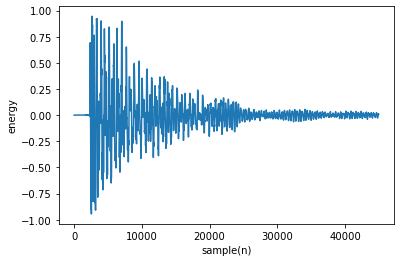

In [6]:
x = np.arange(sample.get_frames())
y = sample.get_data_l()
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('energy')
plt.show()

In [7]:
sample.get_frames()

44928

In [8]:
sample.unload()
sample.load()
loops = sample.get_loops()

loops.start_frame = 1999

loops.end_frame = 1999*3 #sample.get_frames() - 1999

loops.loop_frame = loops.start_frame * 2
loops.count = 10
sample.apply_loops(loops)

True

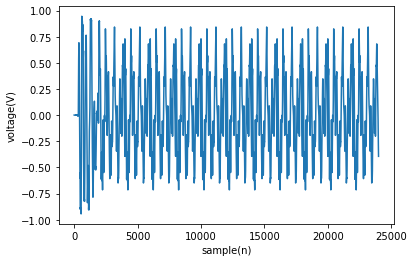

In [9]:
x = np.arange(sample.get_frames())
y = sample.get_data_l()                   
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

In [10]:
sample.get_frames()

23988

In [11]:
rb = sample.get_rubberband()
rb.pitch = 0.5
rb.use = True
sample.apply_rubberband(rb)

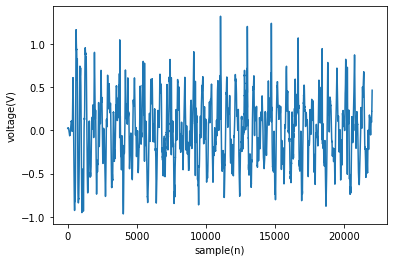

In [12]:
x = np.arange(sample.get_frames())
y = sample.get_data_l()                   
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

In [13]:
sample.get_frames()

22050